In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import random
random.seed(42)

In [3]:
pathToFile = r"C:\Users\jsrei\OneDrive\Desktop\MBAN Semester 2\Data Science 2\datasets\assignment2-data\LD2011_2014.txt"
import fileinput

with fileinput.FileInput(pathToFile, inplace=True) as file:
    for line in file:
        print(line.replace(",", "."), end="")

In [4]:
df = pd.read_csv(r"C:\Users\jsrei\OneDrive\Desktop\MBAN Semester 2\Data Science 2\datasets\assignment2-data\LD2011_2014.txt", sep=';')

In [5]:
df.rename(columns={'Unnamed: 0':'date'}, inplace=True)

In [6]:
df.set_index('date', inplace=True)

In [7]:
df.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='date'>

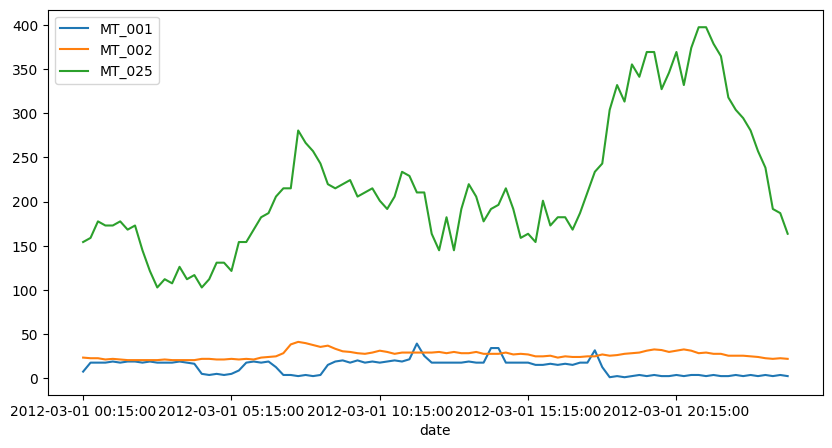

In [12]:
df_test = df.loc['2012-03-01 00:15:00':'2012-03-02 00:00:00'][['MT_001','MT_002', 'MT_025']]
df_test.plot(figsize = (10,5))

In [13]:
data2011 = df.loc['2011-01-01 00:15:00':'2012-01-01 00:00:00']
data2012 = df.loc['2012-01-01 00:15:00':'2013-01-01 00:00:00']
data2013 = df.loc['2013-01-01 00:15:00':'2014-01-01 00:00:00']
data2014 = df.loc['2014-01-01 00:15:00':'2015-01-01 00:00:00']

In [14]:
data2013.shape

(35040, 370)

In [15]:
print(sum(data2011.mean()==0))
print(sum(data2012.mean()==0))
print(sum(data2013.mean()==0))
print(sum(data2014.mean()==0))

210
37
21
1


In [16]:
clients = data2011.columns
clients_no_demand = clients[data2013.mean()==0] # clients with 0 demand
data_13_14 = pd.concat([data2013,data2014], axis=0) #combine 13 and 14
data_13_14.drop(clients_no_demand, axis=1, inplace=True)

In [17]:
data_13_14.shape

(70080, 349)

In [18]:
data = data_13_14.copy()

In [20]:
data['hour'] = data.index.map(lambda x: x[11:])

In [21]:
data.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370,hour
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:15:00,2.538071,22.759602,2.606429,138.211382,63.414634,255.952381,4.522329,239.057239,57.692308,78.494624,...,22300.0,886.075949,1000.000000,16.949153,6.436513,616.330114,76.794658,731.671554,8086.486486,00:15:00
2013-01-01 00:30:00,1.269036,22.759602,2.606429,138.211382,63.414634,264.880952,5.652911,228.956229,57.692308,76.344086,...,21000.0,864.978903,909.090909,18.252934,3.510825,564.530290,76.794658,727.272727,8086.486486,00:30:00
2013-01-01 00:45:00,2.538071,22.759602,2.606429,134.146341,60.975610,250.000000,5.652911,239.057239,54.195804,76.344086,...,18200.0,860.759494,840.909091,16.949153,5.851375,590.869183,68.447412,730.205279,7848.648649,00:45:00
2013-01-01 01:00:00,1.269036,23.470839,2.606429,130.081301,56.097561,226.190476,6.218202,249.158249,50.699301,75.268817,...,15800.0,860.759494,840.909091,16.949153,4.095963,575.065847,58.430718,722.873900,7848.648649,01:00:00
2013-01-01 01:15:00,3.807107,23.470839,2.606429,130.081301,58.536585,229.166667,6.783493,239.057239,57.692308,74.193548,...,15000.0,793.248945,818.181818,16.949153,4.095963,570.676032,60.100167,748.533724,7610.810811,01:15:00


In [22]:
grouped_data = data.groupby('hour')
average_curves = grouped_data.agg('mean')
average_curves.shape

(96, 349)

In [23]:
average_curves

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
hour,,,,,,,,,,,,,,,,,,,,,
00:00:00,5.008344,26.045909,1.938755,130.551843,60.374206,191.136660,7.772366,242.027582,51.585401,54.837237,...,119.625903,36306.438356,1333.223513,1652.677460,37.831080,16.499275,676.790504,148.683880,799.235729,17333.891151
00:15:00,4.917947,25.833512,1.911381,125.863125,57.586034,179.297130,7.426996,232.516950,50.016764,53.424658,...,119.540837,32137.534247,979.064794,1443.711083,33.942955,16.580232,659.875882,155.464587,795.100028,17466.227323
00:30:00,4.984007,24.754964,1.909001,121.566990,55.476111,171.554958,7.179972,225.317098,48.843280,52.514361,...,111.557303,27249.178082,938.598925,1324.501868,31.044275,15.940589,655.911819,153.879754,777.630258,17605.301740
00:45:00,4.980530,24.656560,1.899480,117.961354,53.630137,164.452870,7.013482,218.698400,47.574001,51.150390,...,97.361963,24234.109589,837.292642,1134.433375,30.245932,15.121396,644.171167,151.146889,769.361869,17589.559422
01:00:00,4.963146,23.665699,1.863775,111.732932,52.123288,155.850457,6.843894,212.291868,46.570553,50.223892,...,91.873711,20504.383562,812.213167,1110.118306,29.617260,15.693709,640.233562,148.288243,763.943679,17574.838949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,5.175231,26.859448,2.029206,154.276646,69.679252,241.809361,8.759689,282.270190,60.855925,63.423185,...,214.890538,58302.328767,2422.484249,3540.815691,104.439999,17.210257,704.703718,153.067899,825.106456,17683.613476
23:00:00,5.319519,26.919854,1.973269,148.123399,68.810558,234.515656,8.617205,275.485448,59.574672,62.060686,...,186.405014,52881.095890,2283.053003,3428.486924,97.120966,17.076397,706.203471,150.689505,821.116378,17534.542762
23:15:00,5.356025,26.839962,1.962558,141.869919,67.398931,223.434442,8.373278,267.040266,57.366606,59.584622,...,164.177251,47958.219178,2119.206982,2913.449564,82.870461,16.923299,697.439475,149.175567,827.424376,17311.010737


<Axes: xlabel='hour'>

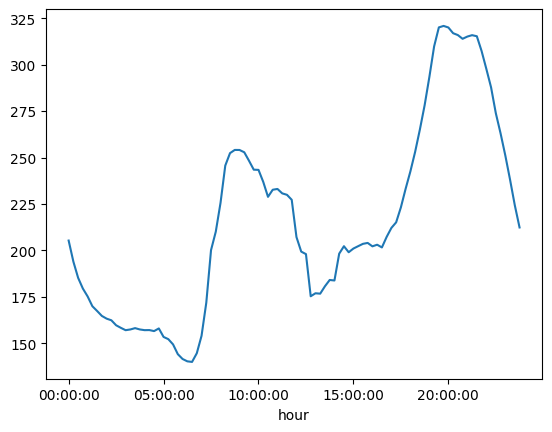

In [25]:
average_curves['MT_025'].plot()

<Axes: xlabel='hour'>

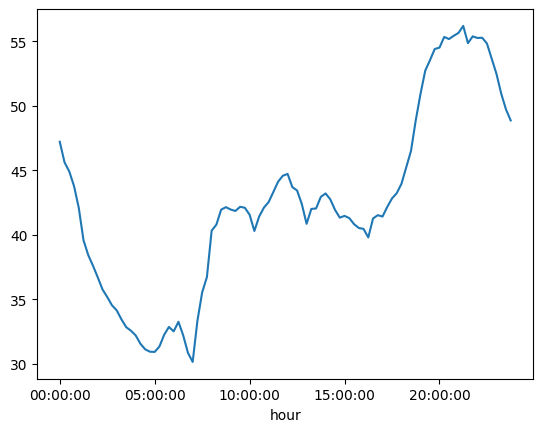

In [26]:
average_curves['MT_020'].plot()

In [28]:
average_curves_normalized = average_curves/average_curves.mean()

In [29]:
average_curves_normalized

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
hour,,,,,,,,,,,,,,,,,,,,,
00:00:00,0.964792,0.926674,0.991800,1.140106,1.186498,1.008914,1.170686,0.946572,0.983915,0.948867,...,0.414676,0.748555,0.561491,0.430085,0.471574,1.358632,1.215272,1.170441,0.974307,0.992967
00:15:00,0.947378,0.919117,0.977796,1.099159,1.131703,0.946419,1.118666,0.909376,0.953996,0.924425,...,0.414381,0.662602,0.412336,0.375704,0.423108,1.365299,1.184899,1.223818,0.969266,1.000548
00:30:00,0.960104,0.880744,0.976579,1.061641,1.090238,0.905552,1.081459,0.881217,0.931614,0.908674,...,0.386706,0.561815,0.395294,0.344682,0.386975,1.312627,1.177781,1.211343,0.947969,1.008515
00:45:00,0.959434,0.877243,0.971708,1.030153,1.053960,0.868064,1.056382,0.855331,0.907404,0.885073,...,0.337499,0.499651,0.352628,0.295219,0.377024,1.245171,1.156699,1.189829,0.937889,1.007613
01:00:00,0.956085,0.841989,0.953443,0.975761,1.024347,0.822656,1.030838,0.830275,0.888265,0.869041,...,0.318475,0.422753,0.342066,0.288892,0.369187,1.292298,1.149629,1.167326,0.931284,1.006770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,0.996941,0.955618,1.038072,1.347294,1.369364,1.276390,1.319398,1.103961,1.160737,1.097433,...,0.744905,1.202059,1.020236,0.921445,1.301872,1.417178,1.265394,1.204952,1.005845,1.013001
23:00:00,1.024736,0.957767,1.009456,1.293558,1.352292,1.237890,1.297937,1.077426,1.136299,1.073857,...,0.646161,1.090286,0.961514,0.892213,1.210639,1.406155,1.268087,1.186229,1.000981,1.004462
23:15:00,1.031768,0.954925,1.003976,1.238946,1.324550,1.179398,1.261197,1.044397,1.094183,1.031013,...,0.569110,0.988787,0.892510,0.758182,1.033002,1.393548,1.252350,1.174311,1.008670,0.991657


<Axes: xlabel='hour'>

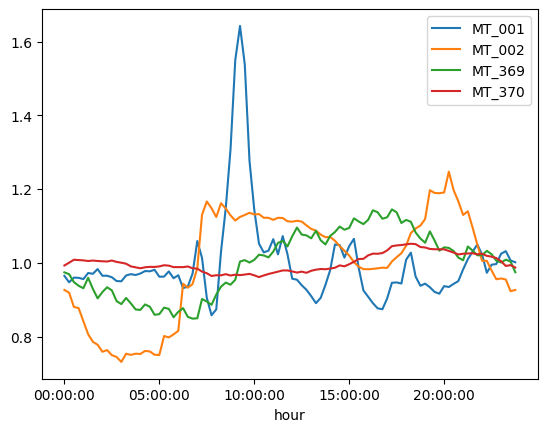

In [31]:
average_curves_normalized[['MT_001','MT_002','MT_369','MT_370']].plot()